In [2]:
import math
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib
import urllib.request as urlreq
import json
from math import *
from functools import reduce
import scipy.stats

In [ ]:
#Load blocks
blockNumber = 12691090
daysBack = 30
f = open("blocksFrom{}To{}DaysBack.txt".format(blockNumber, daysBack), "r")
dic = json.loads(f.read())
blocks = dic["blocks"]
latest = blocks[-1]["block_number"]

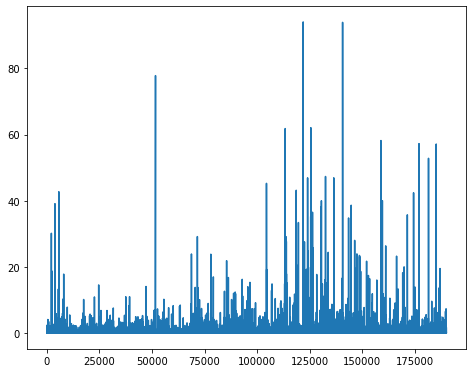

In [5]:
resize = 0.8
plt.rcParams['figure.figsize'] = [resize*25/2.54, resize*20/2.54]
weiToEth = 10**-18
EthToGwei = 10**9
gweiToEth = 10**(-9)
weiToGwei = 10**(-9)
GweiToWei = 10**9
blocks = [block for block in blocks if int(block["miner_reward"]) > 0]
rewards = [int(block["miner_reward"])*weiToEth for block in blocks]
n_blocks = len(rewards)
plt.plot(rewards[0:n_blocks])
plt.show()

In [6]:
def get_local_maxs(l, within=100):
    def red_fun(a,b):
        if a == []:
            return [b]
        i = a[-1][0]
        r1 = a[-1][1]
        j = b[0]
        r2 = b[1]
        if j - i > within:
            a += [(j, r2)]
        elif r2 > r1:
            a[-1] = (j,r2)
        return a

    return reduce(red_fun, enumerate(l), [])

def get_spikes(l, n=10, factor=2, within=100):
    return [(i,v) for i,v in get_local_maxs(l, within=100) if [0 for val in l[i-n:i] + l[i+1:i+n] if factor*val > v] == []]

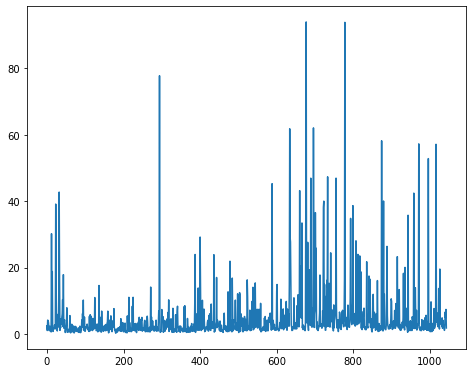

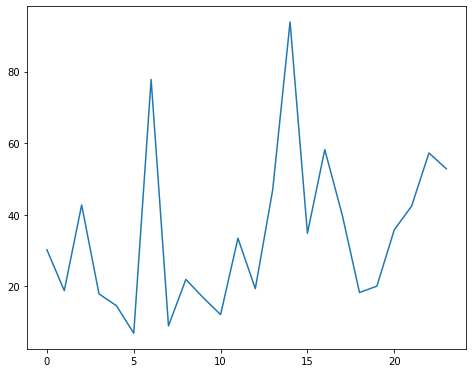

Percentage of blocks with spike MEV: 0.013%
Percentage of total rewards coming from spike MEV: 2.33%


In [7]:
local_maxs = get_local_maxs(rewards)
indices = [i for i,_ in local_maxs]
maxs = [r for _,r in local_maxs]
spikes = get_spikes(rewards, n=100, factor=10)
plt.plot(maxs)
plt.show()
ind = [i for i, _ in spikes]
vals = [s for _, s in spikes]
plt.plot(vals)
plt.show()
print("Percentage of blocks with spike MEV: {}%".format(round(100*len(ind)/n_blocks, 3)))
print("Percentage of total rewards coming from spike MEV: {}%".format(round(100*np.sum(vals)/np.sum(rewards), 3)))

# maybe do a 3d plot of this for varying n, factor

In [8]:
s = 0
n = 2
for i, _ in spikes:
    s += np.sum(rewards[i-n:i] + rewards[i+1:i+n])
print("Mean rewards within {} blocks of spike MEV blocks, in both directions: {}".format(n, s/(2*n*len(spikes))))
non_spike = [rewards[i] for i in range(n_blocks) if i not in ind]
print("Mean rewards for all non spike MEV blocks: {}".format(np.mean(non_spike)))
print("Mean rewards: {}".format(np.mean(rewards)))

Mean rewards within 2 blocks of spike MEV blocks, in both directions: 0.23219661428886798
Mean rewards for all non spike MEV blocks: 0.18137050046073117
Mean rewards: 0.18567296443570708


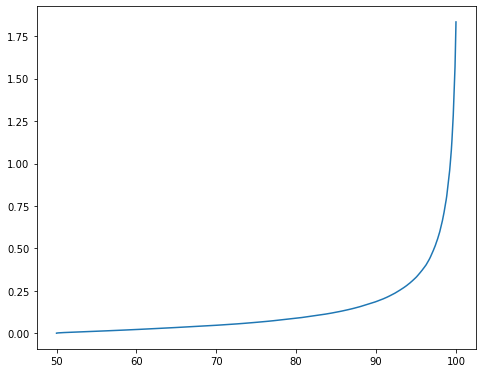

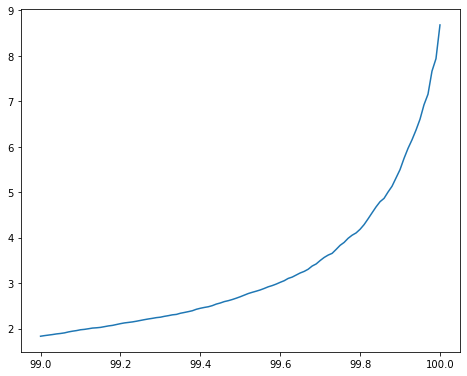

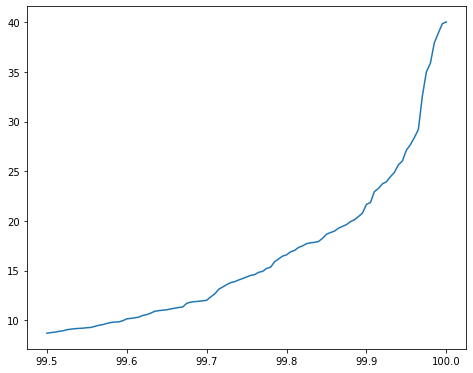

In [9]:
plt.plot(np.linspace(50, 100, 5001), np.percentile(rewards, np.linspace(0, 99, 5001)))
plt.figure()
plt.plot(np.linspace(99, 100, 101), np.percentile(rewards, np.linspace(99, 99.9, 101)))
plt.figure()
plt.plot(np.linspace(99.5, 100, 101), np.percentile(rewards, np.linspace(99.9, 99.99, 101)))

In [10]:
np.percentile(rewards, np.linspace(99, 100, 101))

array([ 1.83413826,  1.84873154,  1.86275782,  1.87493849,  1.88759709,
        1.90096436,  1.92582392,  1.94306709,  1.95601947,  1.97628939,
        1.98769985,  2.00160383,  2.01490092,  2.02404693,  2.03799082,
        2.05718841,  2.07144183,  2.09058305,  2.11086195,  2.12748875,
        2.14175312,  2.15181293,  2.16966672,  2.18968735,  2.20749475,
        2.22608699,  2.24092725,  2.25298107,  2.27544274,  2.28855248,
        2.30706247,  2.32479754,  2.34474146,  2.36968919,  2.39303925,
        2.42223821,  2.44917569,  2.46931205,  2.48911629,  2.523426  ,
        2.55236324,  2.57987227,  2.60944508,  2.63097195,  2.66945027,
        2.70285833,  2.74387595,  2.77825869,  2.80568861,  2.83841525,
        2.87425243,  2.90981894,  2.94478622,  2.97766556,  3.02008152,
        3.06691146,  3.11184957,  3.1439716 ,  3.19880163,  3.24776455,
        3.28280146,  3.35199574,  3.41966596,  3.4992863 ,  3.57346915,
        3.62597842,  3.68695367,  3.77574956,  3.87934893,  3.94

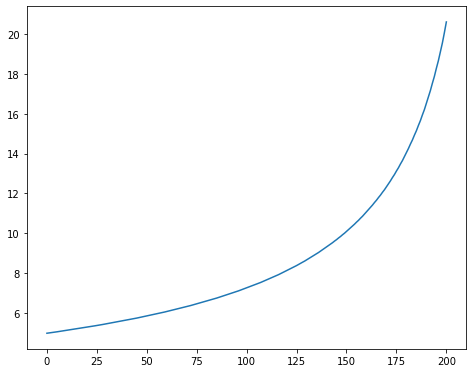

In [11]:
rewards = np.array(rewards)
plt.plot([np.mean(rewards[rewards >= percentile]) for percentile in np.percentile(rewards, np.linspace(99,99.9,201))])

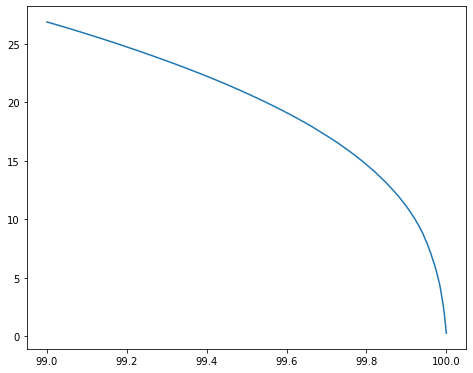

In [12]:
plt.plot(np.linspace(99, 100, 1000), [100*np.sum(rewards[rewards >= percentile])/np.sum(rewards) for percentile in np.percentile(rewards, np.linspace(99, 100, 1000))])